<p style="text-align:center";> <Font size=+3> **Assignment 2: Evolutionary dynamics on Complex Networks** </p> </font>
<p style="text-align:center";> <Font size=+2> **Buisson-Chavot Guillaume - ULB - Bioinformatics** </p> </font>



## **Part I - Complex Networks** 
### **1) Generate Erdos-Renye network (Random networks) [1,2]:**
**For a size of the network of N=10000, calculate a K so that each node has in average degree 4.**

Here are the different libraries used for the assignment.

In [20]:
import numpy as np
from random import randint, choice, choices
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

Here are the different libraries used for the assignment.

In [2]:
def generation(number_of_nodes, number_of_edges=0, print_generated_matrix=False):
    matrix = np.zeros((number_of_nodes, number_of_nodes), dtype = np.bool_)

    actual_nodes = 0
    while actual_nodes <= number_of_edges-1:
        x = randint(0, number_of_nodes-1)
        y = randint(0, number_of_nodes-1)
        if x != y:
            if matrix[x,y] == False:
                matrix[x,y] = True
                matrix[y,x] = True
                actual_nodes += 1

    if print_generated_matrix:
        print(matrix)

    return matrix

In [3]:
def add_edge(matrix):
    edge_added = False
    while edge_added is False:
        x = randint(0, matrix.shape[0]-1)
        y = randint(0, matrix.shape[0]-1)
        if x != y:
            if matrix[x,y] == False:
                matrix[x,y] = True
                matrix[y,x] = True
                edge_added = True
    return matrix

In [4]:
def average_degree(matrix):
    degree = np.count_nonzero(matrix)/matrix.shape[0]
    return degree

In [5]:
def ErdosRenye(matrix, expected_degree=4):
    print('Calulating edges required for an average of degree equals to ', expected_degree)
    myDegree = average_degree(matrix)
    while myDegree < 4:
        matrix = add_edge(matrix)
        newDegree = average_degree(matrix)
        if myDegree != newDegree:
            print('\tactual avg degree = ', newDegree, end="\r")
        myDegree = newDegree
    print()
    number_of_edges = math.floor( np.count_nonzero(matrix)/2 )
    print('Matrix has ', number_of_edges, ' edges.')
    return matrix, number_of_edges



Above is the function which allows to calculate a K so that each node has in average degree 4 for a size of the network of N=10000. The result is written in the output of the main code below and K = 20 000 edges, 

**Present/describe the code you used to generate the network in your document (use pseudo-code notation)**

### **2) Plot the degree distribution of the generated network. Calculate the mean and standard deviation and plot the normal distribution with these same parameters (or in the other word fit the distribution with a Gaussian using Maximum likelihood method)**.

In [6]:
def plot_degree_distribution(matrix, print_values=False):
    print('Plotting degree distribution')
    # 1 dimension matrix containing the number of edges for each node
    number_of_edges_for_each_node = (matrix != False).sum(0)
    uniq, _ = np.unique(number_of_edges_for_each_node, return_counts=True)
    bins = np.arange(uniq.max()+2) - 0.5
    if print_values:
        print('bins   : ', bins)
    count, _ = np.histogram(number_of_edges_for_each_node, bins) # add density=True
    if print_values:
        print('Degrees: ', [range(uniq.max()+1)])
        print('Count  : ', count)
    #plt.scatter(uniq, count/sum(count))
    plt.scatter([range(uniq.max()+1)], count, label = 'Degree distribution')
    plt.xlabel('Degrees')
    plt.ylabel('Count')
    #plt.title('Degree distribution')
    #plt.show()
    return uniq, count, number_of_edges_for_each_node

Above is the function which plot the degree distribution.

In [7]:
def plot_normal_distribution(mean, standard_deviation, number_of_nodes, edges_uniq_values, print_values=False):
    print('Plotting normal distribution')
    x = np.random.normal(mean, standard_deviation, number_of_nodes)
    bins = np.arange(edges_uniq_values.max()+2) - 0.5
    if print_values:
        print('bins   : ', bins)
    count, uniq = np.histogram(x, bins) # add density=True
    if print_values:
        print('Degrees: ', [range(edges_uniq_values.max()+1)])
        print('Count  : ', count)
    plt.scatter([range(edges_uniq_values.max()+1)], count, label = 'Normal distribution')
    #plt.xlabel('x')
    #plt.ylabel('y')
    #plt.title('Normal distribution')
    plt.legend()
    #plt.show()

Above is the function which plot the normal distribution in order to fit our degree distribution.

Starting generation for ErdosRenye
Calulating edges required for an average of degree equals to  4
	actual avg degree =  4.09980.35840.91120.96341.79683.23583.7886
Matrix has  20000  edges.
Plotting degree distribution
mean:  4.0
Standard deviation:  1.998999749874922
Plotting normal distribution


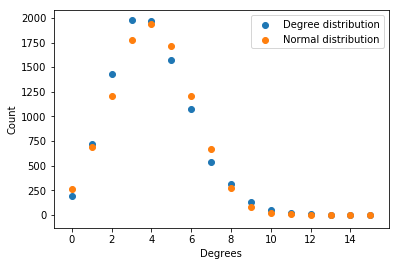

In [22]:
number_of_nodes = 10000

print('Starting generation for ErdosRenye')
starting_number_of_edges = 0

matrix = generation(number_of_nodes, starting_number_of_edges)

matrix_ErdosRenye, number_of_edges = ErdosRenye(matrix)

edges_uniq_values, count, number_of_edges_for_each_node = plot_degree_distribution(matrix_ErdosRenye)

mean = average_degree(matrix_ErdosRenye)
standard_deviation = np.std(number_of_edges_for_each_node)
print('mean: ', mean)
print('Standard deviation: ', standard_deviation)

plot_normal_distribution(mean, standard_deviation, number_of_nodes, edges_uniq_values)
plt.show()

Above is the main code and the plots of the degree distribution and the corresponding normal distribution. 
We have Mean = 4 and Standard deviation = 1.99899975

### **3) Generate a Barabasi-Albert network (Scale Free network):**

In [21]:
def add_one_node_and_edges(matrix, number_of_edges_to_add):
    actual_size = matrix.shape[0]
    number_of_edges_for_each_node = (matrix != False).sum(0)
    sum_of_degrees = np.count_nonzero(matrix)
    column_to_add = np.zeros((actual_size), dtype = np.bool_)
    line_to_add = np.zeros((actual_size + 1), dtype = np.bool_)
    matrix = np.hstack(( matrix, np.atleast_2d(column_to_add).T ))
    matrix = np.vstack(( matrix, line_to_add ))

    # Add edges with given probability
    edge_added = 0
    while edge_added < number_of_edges_to_add:
        xk = randint(0, sum_of_degrees)
        x = 0
        my_sum = number_of_edges_for_each_node[0]
        while my_sum < xk:
            x += 1
            my_sum += number_of_edges_for_each_node[x]
        if matrix[x,actual_size] == False:
            matrix[x,actual_size] = True
            matrix[actual_size,x] = True
            edge_added += 1

    return matrix

def BarabasiAlbert(matrix, number_of_expected_nodes):
    print('Adding nodes until nodes reach ', number_of_expected_nodes)
    nodes_begin = matrix.shape[0]

    while matrix.shape[0] < number_of_expected_nodes:
        nodes_actual = matrix.shape[0]
        nodes_calculated = 1 if nodes_actual - nodes_begin == 0 else nodes_actual - nodes_begin
        nodes_remaining = number_of_expected_nodes - nodes_actual
        matrix = add_one_node_and_edges(matrix, 4)

    return matrix


print('Starting generation for Barabasi-Albert')
matrix = generation(5)
for i in range(4):
    matrix[4][i] = True
    matrix[i][4] = True

#matrix_BarabasiAlbert = np.load('BarabasiAlbertMatrix.npy')
matrix_BarabasiAlbert = BarabasiAlbert(matrix, number_of_nodes)

Starting generation for Barabasi-Albert


**Present/describe the code you used to generate the network in your document (use pseudo-code notation)**

### **4) Plot the degree distribution of the generated network using a linear scale on both axes. Plot in the same figure an exponential distribution which looks similar and reports on the parameters of that distribution.**

Plotting degree distribution


/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


a=23716.368, b=0.496, c=42.675


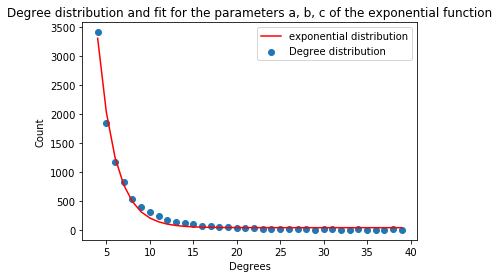

In [10]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c


def plot_degree_distribution_with_exp_fit(matrix, print_values=False):
    print('Plotting degree distribution')
    # 1 dimension matrix containing the number of edges for each node
    number_of_edges_for_each_node = (matrix != False).sum(0)
    uniq, _ = np.unique(number_of_edges_for_each_node, return_counts=True)
    bins = np.arange(uniq.max()+2) - 0.5
    if print_values:
        print('bins   : ', bins)
    count, _ = np.histogram(number_of_edges_for_each_node, bins) # add density=True
    if print_values:
        print('Degrees: ', range(uniq.max()+1))
        print('Count  : ', count)
    #plt.scatter(uniq, count/sum(count))
    plt.scatter(range(uniq.max()+1)[4:40], count[4:40], label = 'Degree distribution')
    popt, pcov = curve_fit(func, range(uniq.max() + 1)[4:40], count[4:40])
    print('a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    plt.plot(range(uniq.max() + 1)[4:40], func(range(uniq.max() + 1)[4:40], *popt), 'r-',
             label='exponential distribution')
    plt.xlabel('Degrees')
    plt.ylabel('Count')
    plt.legend()
    plt.title('Degree distribution and fit for the parameters a, b, c of the exponential function')
    plt.show()
    return uniq, count, number_of_edges_for_each_node

edges_uniq_values, count, number_of_edges_for_each_node = plot_degree_distribution_with_exp_fit(matrix_BarabasiAlbert)


I delete the first four values from the degree distribution in order to get a better fit. The parameters of the exponential distribution are a = 23716.368, b = 0.496 and c = 42.675 with the following function:
Count = a * exp(-b * Degree) + c

### **5) Plot the same distribution on log-log scale. Fit the distribution using Least Square fit. You can use existing functions for fitting and plot the fit next to the data.**

In [ ]:
def plot_log_log_degree_distribution_with_least_square_fit(matrix, print_values=False):
    print('Plotting degree distribution')
    # 1 dimension matrix containing the number of edges for each node
    xdatalist, xdatalog, ydatalog = [], [], []
    number_of_edges_for_each_node = (matrix != False).sum(0)
    uniq, _ = np.unique(number_of_edges_for_each_node, return_counts=True)
    bins = np.arange(uniq.max()+2) - 0.5
    if print_values:
        print('bins   : ', bins)
    count, _ = np.histogram(number_of_edges_for_each_node, bins) 
    if print_values:
        print('Degrees: ', range(uniq.max()+1))
        print('Count  : ', count)
    print(range(uniq.max()+1))  
    print(count)
    for i in range(len(range(uniq.max()+1))):
        xdatalist.append(range(uniq.max()+1)[i])
    for i in range(len(xdatalist)):    
        if xdatalist[i] == 0:
            xdatalist[i] = 0.001
        xdatalog.append(math.log(xdatalist[i])) 
    for i in range(len(count)):
        if count[i] == 0:
            count[i] = 0.001
    print(count)        
    for i in range(len(count)):
        ydatalog.append(math.log(count[i]))    
    plt.scatter(xdatalog, ydatalog, label = 'log-log Degree distribution')
    #popt, pcov = curve_fit(func, range(uniq.max() + 1)[4:40], count[4:40])
    #plt.plot(range(uniq.max() + 1)[4:40], func(range(uniq.max() + 1)[4:40], *popt), 'r-',
    #         label='least square fit)
    plt.xlabel('log(Degrees)')
    plt.ylabel('log(Count)')
    plt.legend()
    plt.title('log-log degree distribution and least square fit')
    plt.show()
    return uniq, count, number_of_edges_for_each_node

edges_uniq_values, count, number_of_edges_for_each_node = plot_log_log_degree_distribution_with_least_square_fit(matrix_BarabasiAlbert)


**What are the parameters of the fit? How does it fit? Why?
Write a paragraph about why we should not use Least Square fit to fit power laws.**

### **6) Plot Complementary Cumulative Distribution and fit it with Least Square Fit, report the obtained parameters and plot of the fitted function.**

Plotting degree distribution


/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


a=12315.779, b=0.153, c=9.146


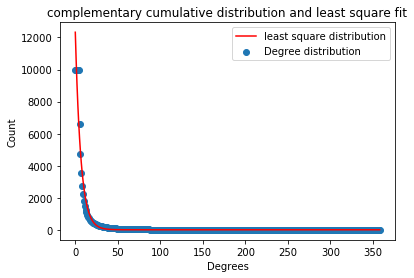

In [12]:
def func1(x, a , b, c):
    return a*x/(b+c*x)


def plot_complementary_cumulative_distribution_with_least_square_fit(matrix, print_values=False):
    print('Plotting degree distribution')
    # 1 dimension matrix containing the number of edges for each node
    number_of_edges_for_each_node = (matrix != False).sum(0)
    uniq, _ = np.unique(number_of_edges_for_each_node, return_counts=True)
    bins = np.arange(uniq.max()+2) - 0.5
    if print_values:
        print('bins   : ', bins)
    count, _ = np.histogram(number_of_edges_for_each_node, bins) # add density=True
    if print_values:
        print('Degrees: ', range(uniq.max()+1))
        print('Count  : ', count)  
    countlist = list(count)
    for i in range(len(countlist)-1, 0, -1):
        countlist[i-1] += countlist[i]
    count = np.array(countlist)    
    #plt.scatter(uniq, count/sum(count))
    plt.scatter(range(uniq.max()+1), count, label = 'Degree distribution')
    popt1, pcov1 = curve_fit(func, range(uniq.max()+1), count)
    print('a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt1))
    plt.plot(range(uniq.max() + 1), func(range(uniq.max() + 1), *popt1), 'r-',
             label='least square distribution')        
    plt.xlabel('Degrees')
    plt.ylabel('Count')
    plt.legend()
    plt.title('complementary cumulative distribution and least square fit')
    plt.show()
    return uniq, count, number_of_edges_for_each_node

edges_uniq_values, count, number_of_edges_for_each_node = plot_complementary_cumulative_distribution_with_least_square_fit(matrix_BarabasiAlbert)


The parameters are a = 12315.779, b = 0.153 and c = 9.146  with the following function: Count = a exp(-b Degree) + c

### **7) Now fit your distribution using maximum likelihood method described in [4]. You can use any of the packages which has the method developed. I recommend powerlaw library for python https://github.com/jeffalstott/powerlaw **

### **8) Report the parameters of the fit and plot them next to distribution.**

### **9) Compare the power law fit with the stretched exponential fit (using the same package). Report the log likelihood ratio R and the p-value. What do these numbers mean?**

### **10) What is the mathematical formula for scale free distribution you generated? Calculate the mean and the standard deviation of function? What would be the mean and standard deviation if the exponent would be 2.7? Use reference [1] to help you out especially chapter 2.2.2. Scale-free degree distributions. You can calculate the integral using pan and paper and scan it and attach it to the rest of PDF.**

## **Part II – Game Theory on Networks**
### **1) Run a simulation of agents playing Prisoner’s Dilemma on the generated networks**
**- Explain why would we set up the probability P ij like this? Why does it make sense to update your actions like that?**

In [23]:
def play_game(matrix, rounds, P=0, R=1, S=-0.1, T=1.03):
    Dmax = max(T, R) - min(S, P)
    number_of_players = matrix.shape[0]
    cooperators_per_turn = []
    payoff_for_each_player = np.zeros(number_of_players)
    degree_for_each_player = matrix.sum(0)
    kmax = np.zeros((number_of_players, number_of_players))
    for i in range(number_of_players-1):
        for j in range(i, number_of_players):
            if i == j:
                my_max = 0
            else:
                my_max = max(degree_for_each_player[i], degree_for_each_player[j])
            kmax[i][j] = my_max
            kmax[j][i] = my_max

    denominator = kmax * Dmax
    for round in range(rounds):
        # Chose Cooperate or Defect according to probabilities
        if round == 0:
            cooperate_or_defect = np.random.choice(a=[False, True], size=(number_of_players)) # True if cooperate
        else:
            for i in range(number_of_players):
                neighbors = np.nonzero(matrix[i])[0]
                if len(neighbors) != 0:
                    j = choice(neighbors)
                    if cooperate_or_defect[i] != cooperate_or_defect[j]: # Change only possible if players have different choices
                        Pij = (payoff_for_each_player[j] - payoff_for_each_player[i]) / denominator[i][j]
                        change = choices((True, False), weights=(Pij, 1-Pij))
                        if change:
                            cooperate_or_defect[i] = cooperate_or_defect[j]

        # Compute the new payoffs (W)
        for i in range(number_of_players):
            neighbors = np.nonzero(matrix[i])[0]
            if len(neighbors) != 0:
                if cooperate_or_defect[i]:
                    for neighbor in neighbors:
                        payoff_for_each_player[i] += R if cooperate_or_defect[neighbor] else S
                else:
                    for neighbor in neighbors:
                        payoff_for_each_player[i] += T if cooperate_or_defect[neighbor] else P

        cooperators_per_turn.append(cooperate_or_defect.sum(0))

    return cooperators_per_turn


If Wj is smaller than Wi, the player will not change his strategy. In fact, he will change his strategy depending on the other payoff of the other players.If the mean of payoff of their neighbors is higher than his own payoff, he will change his strategy else he keeps the old strategy.

In [ ]:
cooperators_per_turn_ErdosRenye = play_game(matrix_ErdosRenye, 1500, P=0, R=1, S=-0.1, T=1.03)

In [ ]:
cooperators_per_turn_BarabasiAlbert = play_game(matrix_BarabasiAlbert, 1500, P=0, R=1, S=-0.1, T=1.03)

### **2) Plot the cooperation level over time for all the values of T and for both networks. Establish after how many rounds the system reaches stationary state (when the level of cooperation does not change too much).**

### **3) Average the stationary cooperation level over 20 simulations (for each T and both networks). Plot the dependence of the stationary cooperation level on the value of T for both networks.**

In [24]:
T=[1.03, 1.07, 1.1, 1.2, 1.3, 1.5, 1.7, 1.9, 1.95]
cooperators_erdos_renye_list = []
number_of_turns = 1500
for t in T:
    cooperators_per_t = []
    for n in range(20):
        cooperators_per_turn = play_game(matrix_ErdosRenye, number_of_turns, T=t)
        cooperators_per_t.append(cooperators_per_turn)
    coop = np.matrix(cooperators_per_t)
    cooperators_erdos_renye_list.append((t, np.squeeze(np.asarray(np.average(coop, axis=0)))))

for t, i in cooperators_erdos_renye_list:
    plt.scatter(range(number_of_turns), i, label='T='+str(t))
    plt.xlabel('Turn')
    plt.ylabel('Cooperators')
    plt.title('Cooperators by turn')
plt.show()

cooperators_barabasi_albert_list = []
number_of_turns = 3000
for t in T:
    cooperators_per_t = []
    for n in range(20):
        cooperators_per_turn = play_game(matrix_BarabasiAlbert, number_of_turns, T=t)
        cooperators_per_t.append(cooperators_per_turn)
    coop = np.matrix(cooperators_per_t)
    cooperators_barabasi_albert_list.append((t, np.squeeze(np.asarray(np.average(coop, axis=0)))))

for t, i in cooperators_barabasi_albert_list:
    plt.scatter(range(number_of_turns), i, label='T='+str(t))
    plt.xlabel('Turn')
    plt.ylabel('Cooperators')
    plt.title('Cooperators by turn')
plt.show()

KeyboardInterrupt: 

### **4) Comment the differences of the final cooperation levels.**